In [1]:
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import linear_model

import numpy as np

from datetime import datetime
from datetime import timedelta

import pandas as pd

In [2]:
from lib.dataeng import Etl

In [3]:
etl = Etl()

etl.repo

'/home/benjamin/Downloads/'

In [4]:
df_weight_raw, df_food_raw, df_exos_raw, df_all = etl.extract_store_all()

Le fichier poids le plus récent est : data_BEN_1706420908.zip, parmi :

data_BEN_1706420908.zip
data_BEN_1706332795.zip
data_BEN_1706083174.zip
data_BEN_1706264904.zip
data_BEN_1705987381.zip
data_BEN_1706158812.zip
Le fichier food le plus récent est : File-Export-2020-08-03-to-2024-01-28.zip, parmi 

File-Export-2020-08-03-to-2024-01-27.zip
File-Export-2020-08-03-to-2024-01-26.zip
File-Export-2020-08-03-to-2024-01-24.zip
File-Export-2020-08-03-to-2024-01-25.zip
File-Export-2020-08-03-to-2024-01-28.zip
File-Export-2020-08-03-to-2024-01-23.zip
Le fichier exercices le plus récent est : polar-user-data-export_12baa4ce-79a5-40f8-ad40-74308f7c2c26.zip, parmi :

polar-user-data-export_872b7f7c-c5e0-4b44-b031-f8e8821babae.zip
polar-user-data-export_12baa4ce-79a5-40f8-ad40-74308f7c2c26.zip


100%|██████████| 1828/1828 [01:05<00:00, 27.89it/s]


In [5]:
df_weight = df_weight_raw.groupby('Date').mean()

In [6]:
df_std = df_weight_raw.groupby('Date').std()

for colname in df_weight.columns:
    std_colname = 'std_' + colname
    df_weight[std_colname] = df_std[colname]

In [7]:
df_weight.dropna(inplace=True)

df_weight

,Masse_Totale,Masse_Grasse,Masse_Osseuse,Masse_Musculaire,Masse_Hydrique,MG%,BMR,std_Masse_Totale,std_Masse_Grasse,std_Masse_Osseuse,std_Masse_Musculaire,std_Masse_Hydrique,std_MG%,std_BMR
Date,,,,,,,,,,,,,,
2023-03-04,70.656667,11.420000,2.961667,56.258333,39.496667,0.161627,1649.512000,0.036148,0.058992,0.004082,0.056716,0.066533,0.000812,1.264415
2023-03-05,71.880000,11.848571,3.000000,57.014286,40.180000,0.164837,1666.678857,0.092376,0.106369,0.000000,0.037353,0.053229,0.001281,0.821828
2023-03-06,71.030000,10.924000,3.010000,57.082000,40.476000,0.153794,1668.289600,0.023452,0.030496,0.000000,0.031937,0.040988,0.000427,0.787734
2023-03-07,72.185000,11.126667,3.060000,57.986667,41.366667,0.154141,1688.860000,0.018708,0.050067,0.000000,0.052026,0.072019,0.000706,1.255156
2023-03-08,72.283333,10.178333,3.131667,58.956667,42.821667,0.140811,1711.468000,0.042269,0.052313,0.004082,0.038297,0.064317,0.000674,0.893206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-24,72.864167,12.309167,3.028333,57.512500,40.590833,0.168932,1677.988000,0.106725,0.073418,0.003892,0.060321,0.057755,0.000820,1.370753
2024-01-25,73.599167,12.578333,3.049167,57.956667,40.979167,0.170902,1688.050000,0.132285,0.089527,0.002887,0.064008,0.059461,0.000957,1.469199
2024-01-26,73.905833,12.539167,3.069167,58.285833,41.313333,0.169663,1695.520000,0.111229,0.094816,0.002887,0.058069,0.059289,0.001074,1.267319


In [16]:
PAST = 90 # on regarde les N derniers jours
PAST_REG = 30 # horizon de temps passé pour la régression
FUTUR = 30 # vers les M prochains jours
MOY = 7

df_weight2 = df_weight.rolling(window=MOY).mean()[-PAST:]

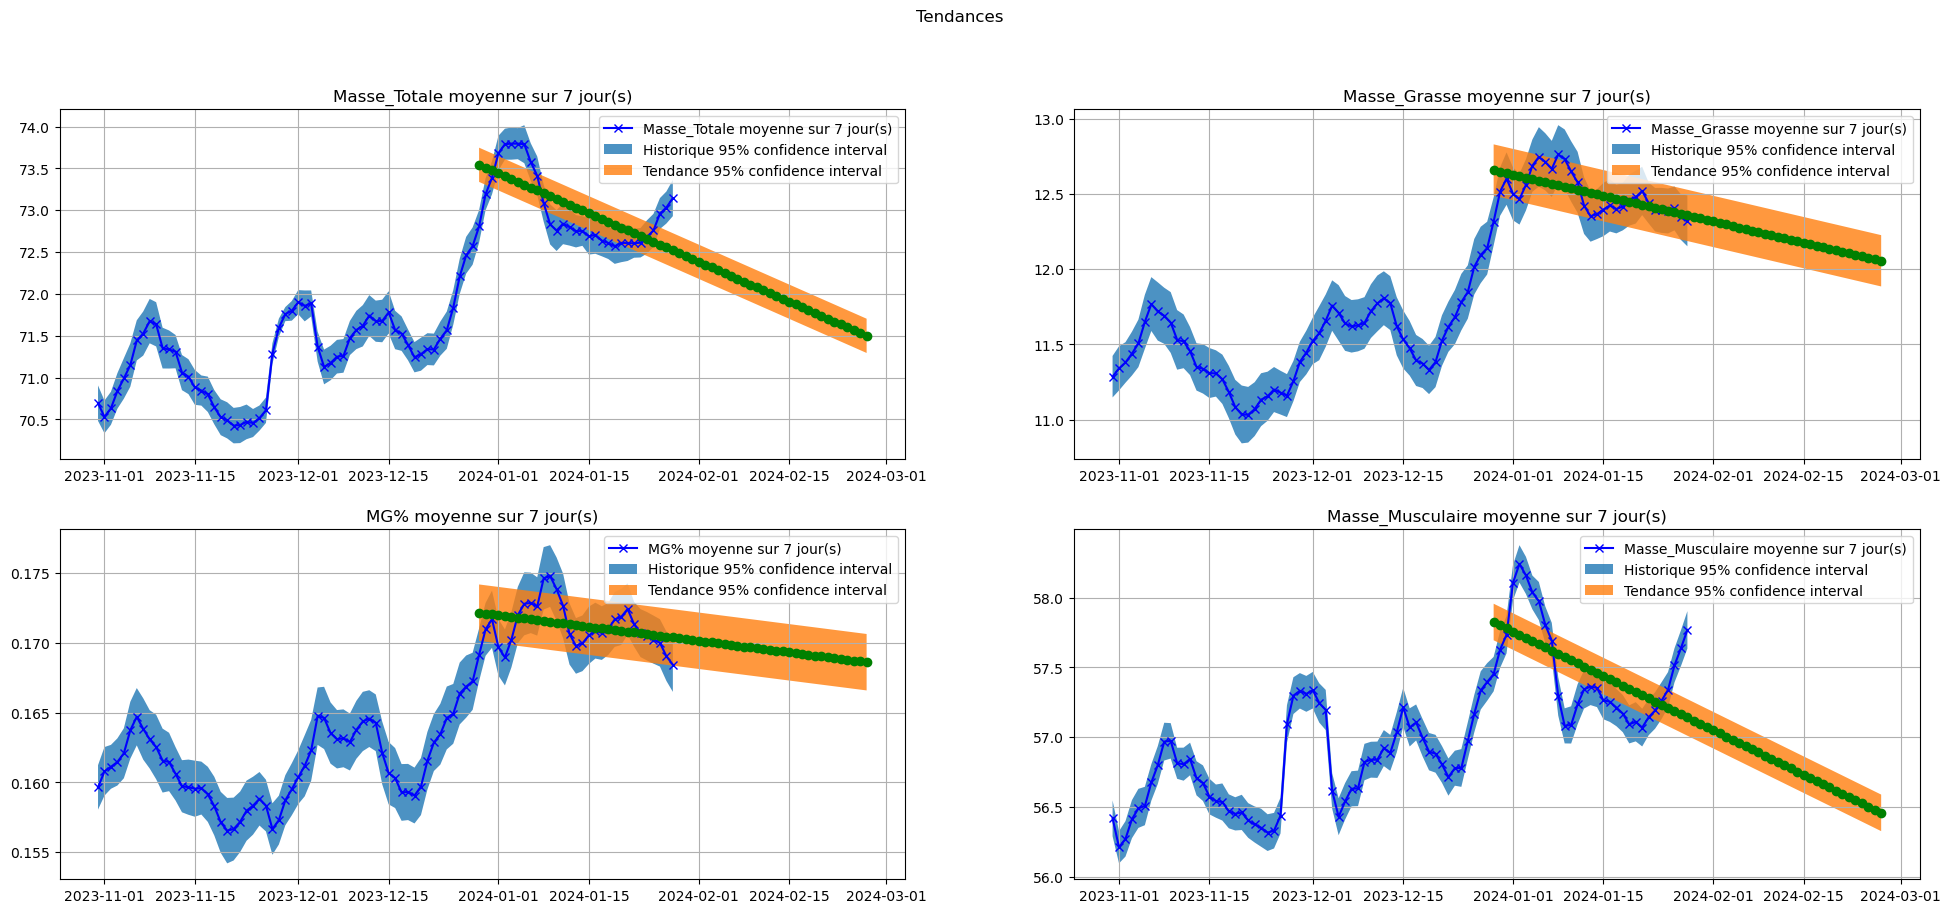

In [17]:
fig, ax = plt.subplots(figsize=(24,10), nrows=2, ncols=2)

list_to_display = ['Masse_Totale', 'Masse_Grasse', 'MG%', 'Masse_Musculaire']

for i, name in enumerate(list_to_display):
    r = i//2
    c = i%2
    name_std = 'std_' + name

    # historique avec standard deviation
    lbl = name + f' moyenne sur {MOY} jour(s)'
    ax[r,c].plot(df_weight2[name], marker = 'x', color='blue', label=lbl)
    ax[r,c].fill_between(
            df_weight2.index,
            df_weight2[name] - 1.96 * df_weight2[name_std],
            df_weight2[name] + 1.96 * df_weight2[name_std],
            alpha=0.8,
            label=r"Historique 95% confidence interval",
        )
    ax[r,c].grid(True)
    ax[r,c].set_title(lbl)

    # tendance
    full_std = df_weight2[name_std].mean()
    # projection LR
    lrr = LinearRegression()
    X_past = np.array( [ d.toordinal() for d in df_weight2.index[-PAST_REG:] ] ).reshape(-1,1)
    y = df_weight2[name][-PAST_REG:]
    lrr.fit(X_past, y)
    # calcul tendance
    X_trend = [ df_weight2.index[-1] + timedelta(days=i) for i in range(-PAST_REG, FUTUR+1 )]
    X_trend = np.array( [ d.toordinal() for d in X_trend ] ).reshape(-1,1)
    y_pred = lrr.predict(X_trend)

    X_trend_days = [ datetime.fromordinal(X_trend[i][0]) for i in range(len(X_trend)) ]
    df_pred = pd.DataFrame( data={"tendance" : y_pred}, index=X_trend_days )
    ax[r,c].plot(df_pred, marker='o', color='green')

    ax[r,c].fill_between(
            df_pred.index,
            df_pred['tendance'] - 1.96 * full_std,
            df_pred['tendance'] + 1.96 * full_std,
            alpha=0.8,
            label=r"Tendance 95% confidence interval",
    )

    ax[r,c].legend()
    
fig.suptitle(f'Tendances')

plt.show()